In [1]:
%reload_ext autoreload
%autoreload 2
dataset_name = "aidelman"

In [2]:
import datasets
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 12)


dataset_module = datasets.datasets_by_name_all[dataset_name]
x,y,metadata = dataset_module.load(dropna=True,verbose=True)
output_variable = "em"
y = datasets.map_y_em(y,dataset_name)

# generate dataframe with both x and y
xy = pd.concat([x,y],axis=1)
xym = pd.concat([x,y,metadata],axis=1)
xym.describe()



Warning loading data from data/Concatenadas_sinRepes_dropnan_LAMOST.csv:
Dropped 293 rows with missing values. 
Rows (original):   3365790
Rows (after drop): 3365497
         em
0         0
1         0
2         0
3         0
4         0
...      ..
3365492   0
3365493   0
3365494   0
3365495   0
3365496   1

[3365497 rows x 1 columns]


,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag,em,RA,W1mag,DEC,BeC1,BeC,EM2,W2mag,Be_EM2,BeC2,EMobj,PStar
count,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.291933e+06,3.354140e+06
mean,1.786886e+01,1.662518e+01,1.549453e+01,1.479717e+01,1.514615e+01,1.360766e+01,1.311541e+01,1.296007e+01,8.760370e-01,1.604449e+02,1.286307e+01,3.969210e+01,5.755465e-04,2.124500e-03,2.084714e-02,1.294145e+01,3.681477e-04,1.769129e-03,8.956157e-01,9.963200e-01
std,1.893717e+00,1.447450e+00,1.271958e+00,1.223942e+00,1.285769e+00,1.254533e+00,1.293952e+00,1.316273e+00,3.295394e-01,1.241703e+02,1.348021e+00,1.941806e+01,2.398365e-02,4.604332e-02,1.428725e-01,1.393929e+00,1.918365e-02,4.202381e-02,3.057584e-01,5.579080e-02
min,0.000000e+00,1.029000e+01,1.016000e+01,9.260000e+00,6.151000e+00,3.206000e+00,2.146000e+00,1.733000e+00,0.000000e+00,4.511122e-05,-8.890000e-01,-6.584084e+01,0.000000e+00,0.000000e+00,0.000000e+00,-3.820000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.668000e+01,1.571000e+01,1.467000e+01,1.401000e+01,1.436000e+01,1.281500e+01,1.235300e+01,1.220600e+01,1.000000e+00,6.891489e+01,1.209500e+01,2.541921e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.212600e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,1.792000e+01,1.672000e+01,1.560000e+01,1.493000e+01,1.529000e+01,1.382000e+01,1.338100e+01,1.323700e+01,1.000000e+00,9.328397e+01,1.314200e+01,4.369336e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.318700e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,1.918000e+01,1.764000e+01,1.641000e+01,1.570000e+01,1.608000e+01,1.454600e+01,1.407700e+01,1.393200e+01,1.000000e+00,3.077318e+02,1.385400e+01,5.666989e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.394400e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.335000e+01,2.279000e+01,2.214000e+01,2.021000e+01,2.047000e+01,1.820800e+01,1.754000e+01,1.737100e+01,1.000000e+00,3.599997e+02,1.689100e+01,6.814930e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.783000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Variable visualization

Text(0.5, 1.0, 'Per class boxplots')

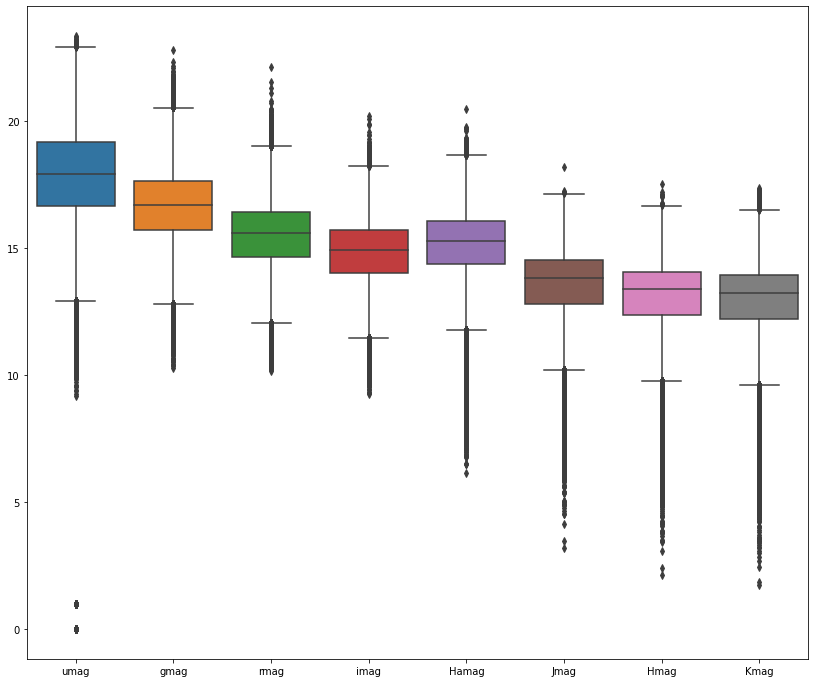

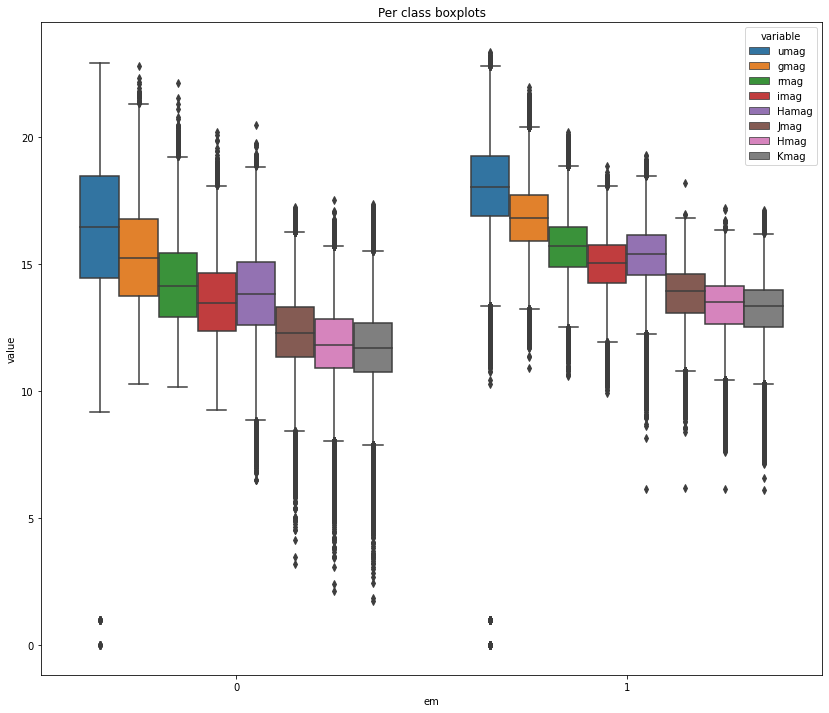

In [3]:

sn.boxplot(data=x)

plt.figure()
xy_long = pd.melt(xy, id_vars=output_variable)
sn.boxplot(x=output_variable, y='value', hue='variable', data=xy_long)
plt.title("Per class boxplots")
        

In [11]:
pd.plotting.parallel_coordinates(xy,output_variable,color=('#556270','#C7F464'))


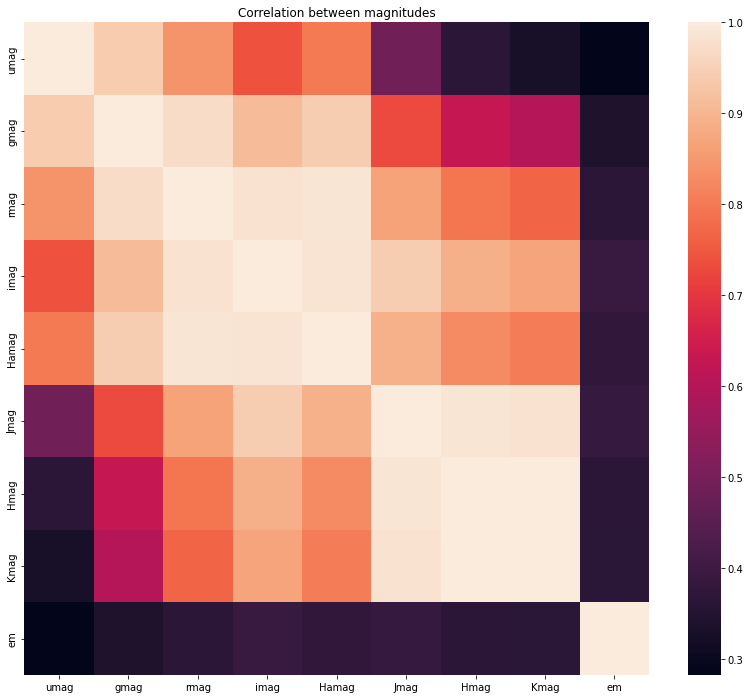

In [4]:
sn.heatmap(xy.corr().abs())
plt.title("Correlation between magnitudes")
plt.show()

sn.pairplot(xy,hue="em")
plt.suptitle("Scatterplots between magnitudes")
# axes=pd.plotting.scatter_matrix(x,c=y["em"],alpha=0.9,grid=False,figsize=(14,12))


# Outlier detection via confidence interval

In [10]:
from preprocessing import outliers
indices = outliers.detect_outliers_confidence_interval(x,confidence=0.999,verbose=True)

outliers_df = xym[indices]
outliers_df.to_csv(f"reports/outliers_confidence_interval_{dataset_name}.csv")
outliers_df

Confidence  (desired): 0.999
Confidence (adjusted): 0.999875
Z-score    (adjusted): 3.662259930887615


,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag,em,RA,...,Ref,B-TS1,GroupSize,EM1,GroupID,EMobj,obsid,subclass,PStar,B-TS
0,18.75,16.18,14.15,12.81,13.630,10.234,9.059,8.120,0,313.019375,...,BeSS,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1,11.45,12.10,10.96,10.47,11.070,7.534,7.381,7.288,0,45.657833,...,BeSS,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
7,11.73,12.51,11.75,10.53,10.400,9.092,8.181,7.278,0,291.494792,...,BeSS,0,2,NaN,8,NaN,NaN,NaN,1.0,0
8,11.69,12.41,10.61,10.10,10.150,8.915,8.831,8.815,0,36.437375,...,BeSS,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
9,11.30,12.17,11.92,10.98,7.833,8.063,7.833,7.735,0,348.866333,...,BeSS,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365476,11.54,12.38,11.68,9.95,9.980,9.211,9.289,9.302,0,100.931931,...,Zari2021,NaN,NaN,0,NaN,0.0,4.4309185E7,B6,1.0,1
3365478,11.22,12.06,11.69,9.98,9.930,9.623,9.662,9.670,0,98.190994,...,Zari2021,NaN,NaN,0,NaN,0.0,4.3814105E7,B6,1.0,1
3365482,10.72,11.50,11.36,10.45,10.500,9.463,9.291,9.156,0,78.668625,...,Zari2021,NaN,NaN,0,NaN,0.0,8.9403152E7,B6,1.0,1
3365491,10.72,12.25,12.18,10.52,10.570,9.107,9.002,8.954,0,68.068626,...,Zari2021,NaN,NaN,0,NaN,0.0,2.9814218E7,B9,1.0,1


# Outlier detection via IQR

In [12]:
from preprocessing import outliers
indices = outliers.detect_outliers_iqr(x,iqr_factor=3)    

outliers_df = xym[indices]
outliers_df.to_csv(f"reports/outliers_iqr_{dataset_name}.csv")
outliers_df

,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag,em,RA,...,Ref,B-TS1,GroupSize,EM1,GroupID,EMobj,obsid,subclass,PStar,B-TS
1,11.45,12.10,10.96,10.47,11.070,7.534,7.381,7.288,0,45.657833,...,BeSS,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
9,11.30,12.17,11.92,10.98,7.833,8.063,7.833,7.735,0,348.866333,...,BeSS,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
10,1.00,12.40,10.71,10.06,10.250,7.789,7.650,7.419,0,34.284250,...,BeSS,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
11,1.00,12.40,10.79,10.16,10.340,8.792,8.825,8.839,0,34.314875,...,BeSS,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
15,11.23,12.00,12.18,10.48,8.776,8.904,8.776,8.489,0,295.712167,...,BeSS,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364752,10.27,11.58,11.76,10.19,10.220,6.792,6.612,6.450,0,89.311714,...,Zari2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3364945,11.04,11.90,12.09,10.34,10.480,6.527,6.230,6.070,0,335.514069,...,Zari2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3365014,11.63,12.46,12.17,11.23,10.460,6.535,6.198,6.066,0,334.637085,...,Zari2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3365029,11.61,12.47,11.99,10.32,10.330,7.318,6.970,6.824,0,334.231110,...,Zari2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


# Analysis of q-features ($q_3$) (all magnitudes)

In [7]:
x_np=x.to_numpy()
import qfeatures
coefficients = dataset_module.coefficients
systems = dataset_module.systems
coefficients_np = np.array([coefficients[k] for k in x.columns])
systems = [systems[k] for k in x.columns]
q=qfeatures.calculate(x_np,coefficients_np,x.columns,systems,combination_size=3)
m = q.magnitudes

q_df = pd.DataFrame(m, columns = q.column_names)
q_df.describe()


,umag_gmag_rmag,umag_gmag_imag,umag_gmag_Hamag,umag_gmag_Jmag,umag_gmag_Hmag,umag_gmag_Kmag,umag_rmag_imag,umag_rmag_Hamag,umag_rmag_Jmag,umag_rmag_Hmag,...,imag_Hamag_Jmag,imag_Hamag_Hmag,imag_Hamag_Kmag,imag_Jmag_Hmag,imag_Jmag_Kmag,imag_Hmag_Kmag,Hamag_Jmag_Hmag,Hamag_Jmag_Kmag,Hamag_Hmag_Kmag,Jmag_Hmag_Kmag
count,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,...,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06
mean,7.101673e-01,7.845507e-02,4.903357e-01,-3.324517e+00,-7.072960e+00,-1.181180e+01,1.526071e+00,2.035702e+00,-3.076650e+00,-8.383466e+00,...,5.698465e-01,1.549327e+00,2.722969e+00,1.301050e-01,-9.056361e-01,1.047203e+00,1.892948e-02,-1.466679e+00,1.177885e+00,3.602619e-01
std,5.695972e-01,4.225679e-01,5.391836e-01,9.491974e-01,2.175210e+00,3.788263e+00,8.343820e-01,1.023566e+00,1.034865e+00,2.761350e+00,...,2.066206e-01,5.452095e-01,9.765704e-01,2.411055e-01,4.876754e-01,4.702217e-01,3.749716e-01,7.412859e-01,6.069718e-01,1.749876e-01
min,-1.763294e+01,-1.802211e+01,-1.804865e+01,-2.366333e+01,-3.537757e+01,-5.798631e+01,-1.919795e+01,-1.913617e+01,-3.400467e+01,-6.069122e+01,...,-1.204389e+00,-2.593696e+00,-1.769281e+00,-8.949543e+00,-1.584288e+01,-2.668833e+01,-1.180374e+01,-2.172801e+01,-3.429000e+01,-9.731333e+00
25%,3.059740e-01,-1.835088e-01,1.421963e-01,-3.858625e+00,-8.362413e+00,-1.406990e+01,9.366667e-01,1.318131e+00,-3.596444e+00,-9.931913e+00,...,4.277222e-01,1.157500e+00,2.020033e+00,-2.236957e-02,-1.254235e+00,7.278431e-01,-2.123913e-01,-2.003771e+00,8.004902e-01,2.373987e-01
50%,5.887013e-01,-1.023392e-02,3.907009e-01,-3.190569e+00,-6.786152e+00,-1.128657e+01,1.386374e+00,1.888972e+00,-2.894000e+00,-7.957130e+00,...,5.376250e-01,1.471239e+00,2.577810e+00,1.202826e-01,-8.562941e-01,1.023137e+00,1.086957e-02,-1.382627e+00,1.162471e+00,3.498105e-01
75%,1.075671e+00,3.269006e-01,8.163551e-01,-2.665861e+00,-5.531413e+00,-9.088889e+00,2.057953e+00,2.681776e+00,-2.363333e+00,-6.436348e+00,...,6.757361e-01,1.872457e+00,3.291144e+00,2.735217e-01,-5.687059e-01,1.358131e+00,2.508261e-01,-9.474183e-01,1.562784e+00,4.889346e-01
max,7.231948e+00,6.803216e+00,7.065187e+00,4.913431e+00,5.269327e+00,5.639119e+00,7.808304e+00,8.212056e+00,7.023556e+00,1.161565e+01,...,4.656958e+00,8.405826e+00,1.532608e+01,1.234907e+01,1.014053e+01,1.339419e+01,1.731487e+01,1.316661e+01,1.684886e+01,3.972974e+00


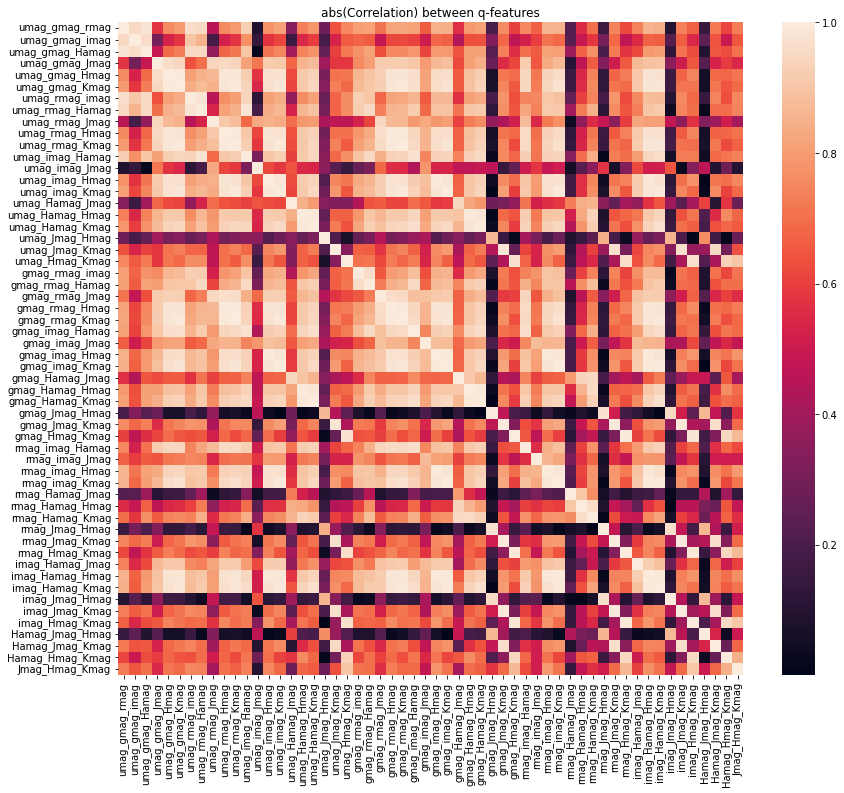

In [8]:
sn.heatmap(q_df.corr().abs())
plt.title("abs(Correlation) between q-features")
plt.show()

# Analysis of q-features ($q_4$) (calculated by system to avoid combinatory explosion)



In [9]:
x_np=x.to_numpy()
import qfeatures
coefficients = dataset_module.coefficients
systems = dataset_module.systems
coefficients_np = np.array([coefficients[k] for k in x.columns])
systems = [systems[k] for k in x.columns]
q= qfeatures.calculate(x_np,coefficients_np,x.columns,systems,combination_size=4,by_system=False)

m = q.magnitudes

q_df = pd.DataFrame(m, columns = q.column_names)
q_df.describe()


,umag_gmag_rmag_imag,umag_gmag_rmag_Hamag,umag_gmag_rmag_Jmag,umag_gmag_rmag_Hmag,umag_gmag_rmag_Kmag,umag_gmag_imag_Hamag,umag_gmag_imag_Jmag,umag_gmag_imag_Hmag,umag_gmag_imag_Kmag,umag_gmag_Hamag_Jmag,...,rmag_imag_Hmag_Kmag,rmag_Hamag_Jmag_Hmag,rmag_Hamag_Jmag_Kmag,rmag_Hamag_Hmag_Kmag,rmag_Jmag_Hmag_Kmag,imag_Hamag_Jmag_Hmag,imag_Hamag_Jmag_Kmag,imag_Hamag_Hmag_Kmag,imag_Jmag_Hmag_Kmag,Hamag_Jmag_Hmag_Kmag
count,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,...,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06,3.365497e+06
mean,-2.319529e-02,-9.901063e-01,-4.984240e-02,-1.580797e-01,-1.348518e-01,3.590719e-01,-6.599217e-02,-2.228242e-01,-1.825683e-01,6.272440e-02,...,9.213531e-02,2.653156e-02,8.246856e-02,1.769076e-01,2.830291e-01,4.651354e-01,3.236477e-01,8.477233e-02,1.908938e-01,1.061215e-01
std,4.542259e-01,1.347748e+00,4.128644e-01,3.673810e-01,3.717674e-01,6.162392e-01,3.989973e-01,3.379772e-01,3.477227e-01,4.223449e-01,...,2.850390e-01,2.102933e-01,2.023262e-01,2.111862e-01,7.253961e-01,2.812465e-01,2.330961e-01,2.673409e-01,4.496878e-01,6.672854e-01
min,-1.917617e+01,-3.750006e+01,-2.079780e+01,-2.118010e+01,-2.156057e+01,-1.754581e+01,-2.178061e+01,-2.214198e+01,-2.257954e+01,-2.049824e+01,...,-2.176065e+01,-2.007462e+00,-1.955773e+00,-6.024351e+00,-5.744622e+01,-8.492462e+00,-2.291449e+00,-6.657208e+00,-3.568557e+01,-5.142187e+01
25%,-2.735000e-01,-1.071176e+00,-2.922075e-01,-3.681351e-01,-3.484182e-01,-1.837209e-02,-3.062222e-01,-4.171680e-01,-3.831125e-01,-2.125986e-01,...,-4.051948e-02,-3.669231e-02,2.659420e-02,1.017532e-01,-4.151948e-02,2.851538e-01,1.901691e-01,-2.285714e-02,-1.042857e-02,-1.667662e-01
50%,-1.055000e-01,-8.723529e-01,-1.334717e-01,-2.118973e-01,-1.919611e-01,1.981395e-01,-1.468990e-01,-2.641760e-01,-2.286895e-01,-4.718310e-02,...,8.441558e-02,4.807692e-03,5.772947e-02,1.587013e-01,2.863117e-01,4.383846e-01,2.985507e-01,7.259740e-02,1.984286e-01,1.221688e-01
75%,2.330000e-01,-6.017647e-01,1.903899e-01,3.990270e-02,6.887725e-02,6.739535e-01,1.670808e-01,-4.269600e-02,5.975783e-03,3.250563e-01,...,2.170130e-01,4.057692e-02,8.714976e-02,2.098701e-01,6.085325e-01,6.506538e-01,4.458454e-01,1.651948e-01,3.961429e-01,4.039610e-01
max,6.746167e+00,1.201529e+01,6.714289e+00,6.617822e+00,6.650329e+00,1.284735e+01,6.694970e+00,6.556216e+00,6.609373e+00,6.815507e+00,...,9.596104e+00,5.634616e+00,5.627237e+00,5.614779e+00,2.809668e+01,6.943153e+00,7.716184e+00,1.573630e+01,1.850057e+01,2.515778e+01


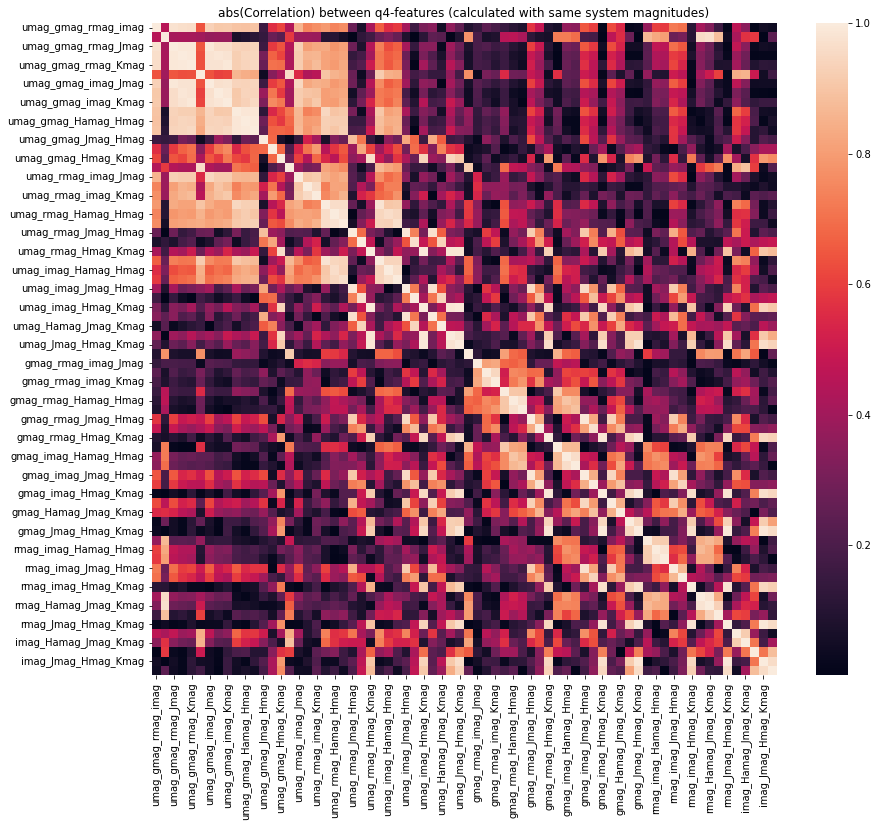

In [10]:
sn.heatmap(q_df.corr().abs())
_=plt.title("abs(Correlation) between q4-features (calculated with same system magnitudes)")

In [11]:
q_dfy=pd.concat([q_df,y],axis=1)
sn.pairplot(q_dfy,hue=output_variable)
_=plt.suptitle("Scatter plots between q4-features (calculated with same system magnitudes)")